## 3. Multiclass Perceptron

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import read_csv
from sklearn.linear_model import Perceptron

### (a) Load in the data set data0.txt. This has 2-d data in four classes (coded as 0,1,2,3). Each row consists of three numbers: the two coordinates of the data points and the label.

In [2]:
data = read_csv('data0.txt', header = None, sep = ' ')
data.columns = ["col1", "col2", "col3", "col4"]
data0 = data.drop(columns=["col4"])

In [3]:
df = pd.DataFrame(data = data0)
X = df.values[:,0:2]
y = df.values[:, -1]

### (b) Run the multiclass Perceptron algorithm to learn a classifier. Create a plot that shows all the data points (with different colors and shapes for different labels) as well as the decision regions.

In [4]:
def predict(weights, bias, inputs):
    a = np.argmax((np.dot(inputs, np.transpose(weights)) + bias), axis = 1)
    return a

def train(inputs, labels):
    n_samples, n_features = inputs.shape
    n_class = len(np.unique(labels))
    
    weights = np.zeros((n_class ,n_features))
    bias = np.zeros(n_class)
    
    while True:
        errors = 0
        for i in range(n_samples):
            y_hat = np.argmax(np.dot(weights, inputs[i]) + bias)
            if (y_hat != labels[i]):
                errors += 1
                index = labels[i]
                weights[index] += inputs[i]
                bias[index] += 1
                weights[y_hat] -= inputs[i]
                bias[y_hat] -+ 1

        if errors == 0:
            break
    return weights, bias

In [5]:
w, b = train(X, y)
pred = predict(w, b, X)
w, b, pred

(array([[  4.,  -3.],
        [-38.,  26.],
        [ 24., -24.],
        [ 10.,   1.]]),
 array([69., 19.,  9., 19.]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3]))

In [6]:
error = 1 - np.mean(y == pred)
print('Error rate for the multiclass perceptron is', error, '%')

Error rate for the multiclass perceptron is 0.0 %


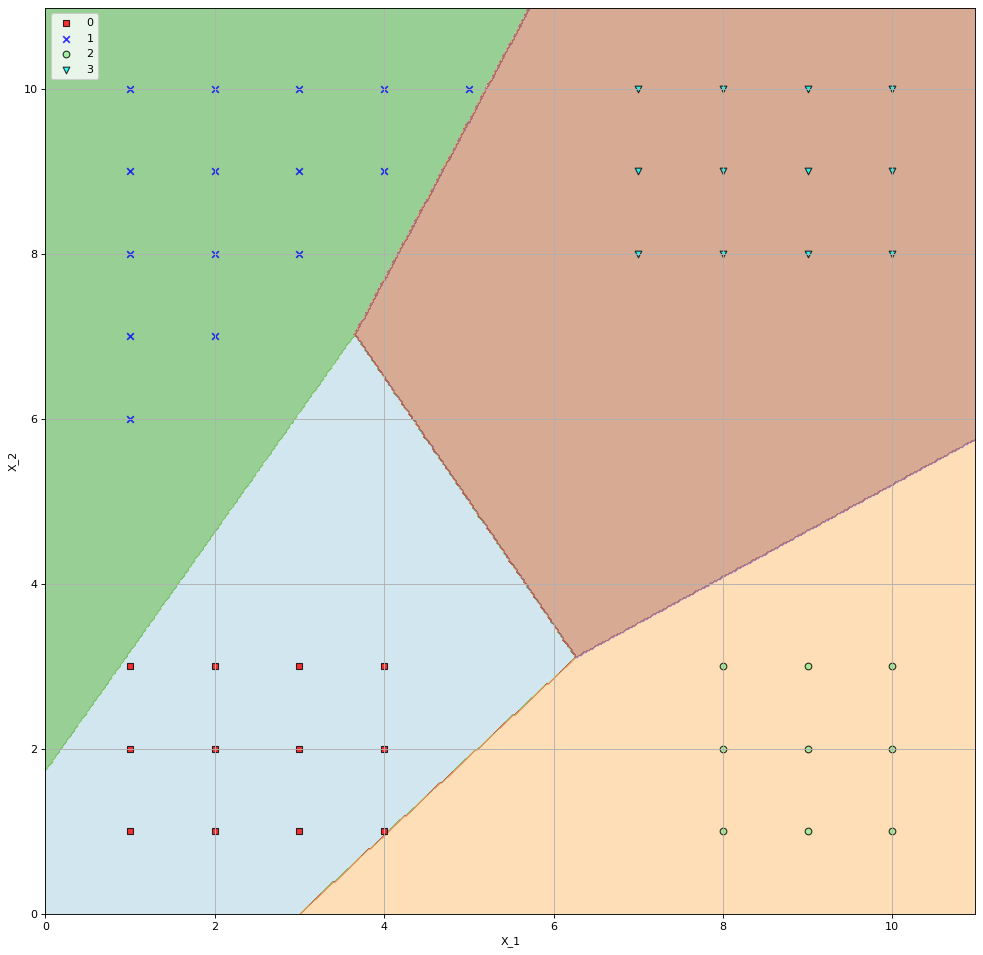

In [7]:
def plot_decision_regions(X, y, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', 'v')
    colors = ('red', 'blue', 'lightgreen', 'cyan')
    
    from matplotlib.pyplot import figure
    figure(figsize=(15, 15), dpi=80)
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = predict(w, b, np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha = 0.5, cmap = plt.cm.Paired)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
plot_decision_regions(X, y)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend(loc='upper left')
plt.grid()
plt.show()